In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import glob

FREQUENCIES_COUNT = 50000
# https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array
EACH_N_ELEMENT = 10

# https://stackoverflow.com/questions/53308674/audio-frequencies-in-python
def read_wav(wav_file_name):
    sr, signal = wavfile.read(wav_file_name)
    return (sr, signal[:FREQUENCIES_COUNT:EACH_N_ELEMENT, 0]) # use the first channel (or take their average, alternatively)

def fetch_frequencies(wav_file_name):
    sr, y = read_wav(wav_file_name)
    return y

def show_frequency_spectrum(wav_file_name):
    sr, y = read_wav(wav_file_name)
    t = np.arange(len(y)) / float(sr)

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    axes = plt.gca()
    axes.set_ylim([-1e9,1e9])

    plt.show()




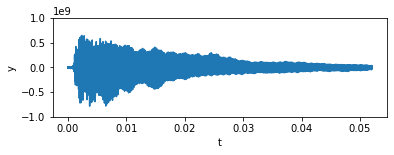

In [2]:
show_frequency_spectrum('samples/A/train/1_out_of_tune/splitted_chord007.wav')

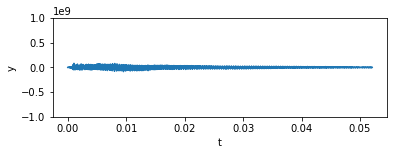

In [3]:
show_frequency_spectrum('samples/C/train/1/splitted_chord007.wav')

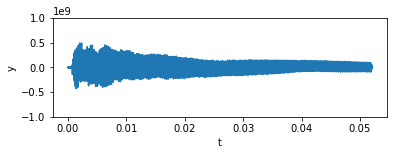

In [4]:
show_frequency_spectrum('samples/E/train/1/splitted_chord007.wav')

In [5]:
def files_to_tensors(files):
    return tf.convert_to_tensor([tf.convert_to_tensor(fetch_frequencies(file), np.int32) for file in files])




In [6]:
model = keras.Sequential([
    keras.layers.Dense(FREQUENCIES_COUNT),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
a_train_files = glob.glob("samples/A/train/*/*.wav")
c_train_files = glob.glob("samples/C/train/*/*.wav")
e_train_files = glob.glob("samples/E/train/*/*.wav")

train_files_data = files_to_tensors(a_train_files + c_train_files + e_train_files)
labels_values = {'A': 0, 'C': 1, 'E': 2}
labels_names = {v: k for k, v in labels_values.items()}
train_labels = tf.convert_to_tensor([labels_values['A']] * len(a_train_files) + [labels_values['C']] * len(c_train_files) + [labels_values['E']] * len(e_train_files), np.int32)

In [8]:
model.fit(train_files_data, train_labels, epochs=5)

Train on 93 samples
Epoch 1/5
93/93 [==============================] - 5s 57ms/sample - loss: 1852508622.4516 - accuracy: 0.3871
Epoch 2/5
93/93 [==============================] - 4s 46ms/sample - loss: 1707235259.8710 - accuracy: 0.7527
Epoch 3/5
93/93 [==============================] - 4s 46ms/sample - loss: 593924131.7849 - accuracy: 0.8817
Epoch 4/5
93/93 [==============================] - 4s 47ms/sample - loss: 105895070.2366 - accuracy: 0.9355
Epoch 5/5
93/93 [==============================] - 6s 60ms/sample - loss: 434884005.1613 - accuracy: 0.9570


In [9]:
def test_files(files):
    test_files_data = files_to_tensors(files)
    for idx, prediction in enumerate(model.predict(test_files_data)):
        print(f'{labels_names[list(prediction).index(1)]} - {files[idx]}')

a_test_files = glob.glob("samples/A/test/*/*.wav")
c_test_files = glob.glob("samples/C/test/*/*.wav")
e_test_files = glob.glob("samples/E/test/*/*.wav")

test_files(a_test_files + c_test_files + e_test_files)

A - samples/A/test/1_out_of_tune/splitted_chord001.wav
A - samples/A/test/1_out_of_tune/splitted_chord003.wav
C - samples/A/test/1_out_of_tune/splitted_chord002.wav
C - samples/C/test/2/splitted_chord001.wav
C - samples/C/test/2/splitted_chord003.wav
C - samples/C/test/2/splitted_chord002.wav
C - samples/C/test/2/splitted_chord004.wav
E - samples/C/test/1/splitted_chord001.wav
C - samples/C/test/1/splitted_chord003.wav
C - samples/C/test/1/splitted_chord002.wav
C - samples/E/test/1/splitted_chord001.wav
E - samples/E/test/1/splitted_chord005.wav
C - samples/E/test/1/splitted_chord002.wav
E - samples/E/test/1/splitted_chord004.wav


In [10]:
test_files(['samples/A/train/1_out_of_tune/splitted_chord009.wav'])

A - samples/A/train/1_out_of_tune/splitted_chord009.wav
